In [1]:
# Import to shut down the warning about tensorflow compilation with avx
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

# util routines to prepare and plot the data
from utils import *

# Set the seed for reproducible results
set_seed()

## Load and prepare data
We load, and then split in train, validation, test set

In [2]:
dataset = load_data("data/{}.csv".format('BH_cdf'))
dataset = prepare_targets_cdf(dataset)
train_data, train_targets, val_data, val_targets, test_data, test_targets = train_test_split(dataset)

Train / Val / Test set: 700000 / 150000 / 150000


## Model Build

__1)__ Define a function to build a keras model

__2)__ Fit the model and save it

In [3]:
# Build, fit model
batch_size = int(0.005 * train_data.shape[0])
model = build_model_cdf(n_layers=4, n_nodes=8)
history = model.fit(train_data, train_targets,
                    epochs = 100,
                    batch_size = batch_size,
                    validation_data = (val_data, val_targets),
                    verbose=0,
                    )
model.save("models/{}.h5".format('BH_cdf_pred'))

## Metrics: mape, mse
__1)__ Evaluate and compute metrics

In [4]:
keys = model.metrics_names

# train set
values = model.evaluate(train_data, train_targets, verbose=0)
train_errors = dict(map(lambda i,j : (i,j) , keys,values))

# validation set
values = model.evaluate(val_data, val_targets, verbose=0)
val_errors = dict(map(lambda i,j : (i,j) , keys,values))

# test set
values = model.evaluate(test_data, test_targets, verbose=0)
test_errors = dict(map(lambda i,j : (i,j) , keys,values))

__2)__ Show the metrics to check overfitting

In [5]:
print('train / val / test')
for key in model.metrics_names:
    print('{} = {:.2e}, {:.2e}, {:.2e}'.format(key, train_errors[key], val_errors[key], test_errors[key]))


train / val / test
loss = 6.00e-01, 5.99e-01, 5.99e-01
accuracy = 1.43e-06, 0.00e+00, 6.67e-06


## Prediction on test set
__1)__ Predict the target of the test set

In [6]:
# Predict from the test_data
test_pred = model.predict(test_data)
test_pred = test_pred.reshape(test_pred.shape[0])

4688/4688 [==============================] - 4s 792us/step


__2)__ Plot the result

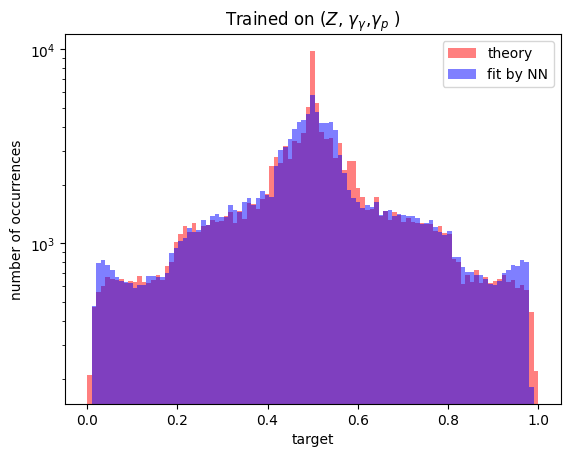

In [7]:
import matplotlib.pyplot as plt

bins = np.linspace(0., 1., 100)

plt.hist(test_targets, bins, color = 'r', alpha=0.5, label='theory')
plt.hist(test_pred, bins, color = 'b', alpha=0.5, label='fit by NN')
plt.yscale('log')
plt.legend(loc='upper right')
plt.xlabel('target')
plt.ylabel('number of occurrences')
plt.title('Trained on ($Z$, $\gamma_{\gamma}$,$\gamma_{p}$ )')
plt.show()

__3)__ Plot the learning curve

/Users/bertrand/Documents/studies/qed_q3d/bh_ML/utils.py:250: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


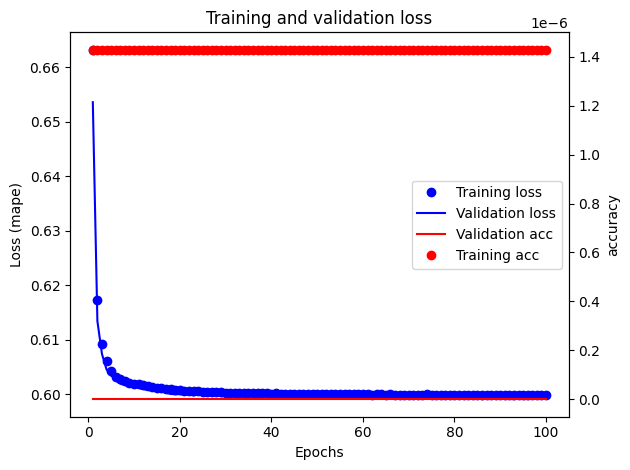

In [8]:
plot_history_cdf(history)